## Q2: Consistent plotting

(This is about python's decorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should initialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifull, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 

In [11]:
import matplotlib.pyplot as plt
from functools import wraps
import numpy as np

In [58]:
# Definding the decorator 'myplot'
def myplot(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        
        # Initialize the figure settings
        plt.figure(figsize=(8, 6))
        plt.rcParams.update({
            'font.size': 12,
            'axes.labelsize': 14,
            'xtick.labelsize': 12,
            'ytick.labelsize': 12,
            'axes.titlesize': 16,
            'legend.fontsize': 12,
            'figure.titlesize': 18,
            'lines.linewidth': 2,
            'axes.grid': True,
            'grid.alpha': 0.5,
            'savefig.format': 'pdf',
            'savefig.bbox': 'tight',
            'savefig.pad_inches': 0.1
        })

        # Call the plotting function
        fig = func(*args, **kwargs)

        # Save the figure to a PDF file
        filename = 'prova.pdf'
        plt.savefig(filename)
        plt.close()

        return fig

    return wrapper

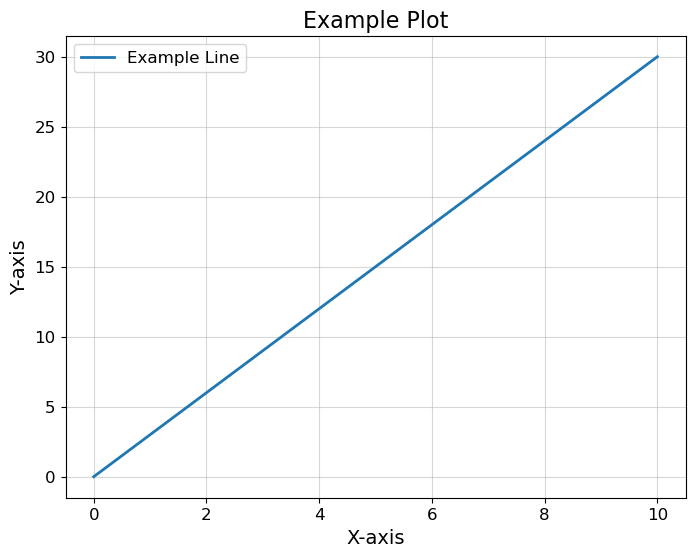

In [62]:
# Example:
@myplot
def plot_data(x, y):
    plt.plot(x, y, label='Example Line')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Example Plot')
    plt.legend()
    return plt.gcf()

# Call the function to generate and save the plot
x = np.linspace(0, 10, 100)
y = 3*x

plot_data(x, y)  # Call the decorated function